<a href="https://colab.research.google.com/github/BYRic-F/Data_practice/blob/main/FB_de_Creneau_Revision_Certif_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1 - Apprentissage supervisé:**

L'apprentissage supervisé est un type d'apprentissage automatique où nous disposons d'exemples de données labellisées. Cela signifie que chaque exemple de données est associé à une étiquette ou à une classe connue. L'objectif de l'apprentissage supervisé est d'apprendre à partir de ces exemples afin de pouvoir prédire ou classer correctement de nouvelles données non labellisées.

Prenons un exemple concret : supposons que nous ayons un ensemble de données contenant des images d'animaux où chaque observation est labellisée avec la nome de l'animal en question correspondant . Dans l'apprentissage supervisé, nous utiliserions ces exemples pour former un modèle capable de reconnaître et de prédire le nom de l'animal dans de nouvelles observations (images) non labellisées.

[Apprentissage Supervisé : Introduction](https://machinelearnia.com/apprentissage-supervise-4-etapes/#:~:text=L'apprentissage%20supervis%C3%A9%20(en%20anglais,t%C3%A2che%20qu'elle%20doit%20r%C3%A9alis%C3%A9e.)




## **1.1 Regression**

La régression en apprentissage supervisé est utilisée pour prédire une valeur continue (comme le prix d'une maison) en fonction d'autres variables (caractéristiques de la maison). Le modèle de régression apprend à partir d'exemples d'entraînement pour trouver une relation mathématique entre les variables d'entrée et la variable de sortie, ce qui permet ensuite de faire des prédictions sur de nouvelles données.


* regression linéaire (linear regression)
* decision tree regressor / Random Forest regressor
* KNN regressor

[Linear regression vs decision trees](https://mlcorner.com/linear-regression-vs-decision-trees/?utm_content=cmp-true)

[Comparing Regression Algorithms](https://www.kaggle.com/code/pgirish/comparing-regression-algorithms/notebook)



### 1.1.1 Régression linéaire, univariée et multivariée
[Documentation officielle Scikit learn](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)

La régression linéaire est une méthode d'apprentissage supervisé utilisée pour prédire une valeur numérique continue en fonction d'un ensemble de variables d'entrée. Elle cherche à établir une relation linéaire entre les variables d'entrée et la variable de sortie. Le but est de trouver la meilleure ligne droite qui minimise l'écart entre les valeurs prédites et les valeurs réelles. Cette méthode est souvent utilisée pour résoudre des problèmes de régression, tels que la prédiction du prix d'une maison en fonction de ses caractéristiques.

*Quelques infos supplémentaires:*

* [Normalization vs Standardization in Linear Regression](https://www.baeldung.com/cs/normalization-vs-standardization)
* [How to Use the Sklearn Linear Regression Function](https://www.sharpsightlabs.com/blog/sklearn-linear-regression/)



In [18]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Charger les données
data = pd.read_csv("https://raw.githubusercontent.com/GMDFr/Dataset/main/winequality-white.csv", sep = ';')

In [3]:
data.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [ ]:
# Etape 1 : Exploration de la donnée
# Etape 2 : Nettoyage
# Etape 3 : Etudes des corrélations

In [5]:
# Etape 1 exploration de la donnée

data.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,4898.0,6.854788,0.843868,3.80000,6.300000,6.80000,7.3000,14.20000
volatile acidity,4898.0,0.278241,0.100795,0.08000,0.210000,0.26000,0.3200,1.10000
citric acid,4898.0,0.334192,0.121020,0.00000,0.270000,0.32000,0.3900,1.66000
residual sugar,4898.0,6.391415,5.072058,0.60000,1.700000,5.20000,9.9000,65.80000
chlorides,4898.0,0.045772,0.021848,0.00900,0.036000,0.04300,0.0500,0.34600
free sulfur dioxide,4898.0,35.308085,17.007137,2.00000,23.000000,34.00000,46.0000,289.00000
total sulfur dioxide,4898.0,138.360657,42.498065,9.00000,108.000000,134.00000,167.0000,440.00000
density,4898.0,0.994027,0.002991,0.98711,0.991723,0.99374,0.9961,1.03898
pH,4898.0,3.188267,0.151001,2.72000,3.090000,3.18000,3.2800,3.82000
sulphates,4898.0,0.489847,0.114126,0.22000,0.410000,0.47000,0.5500,1.08000


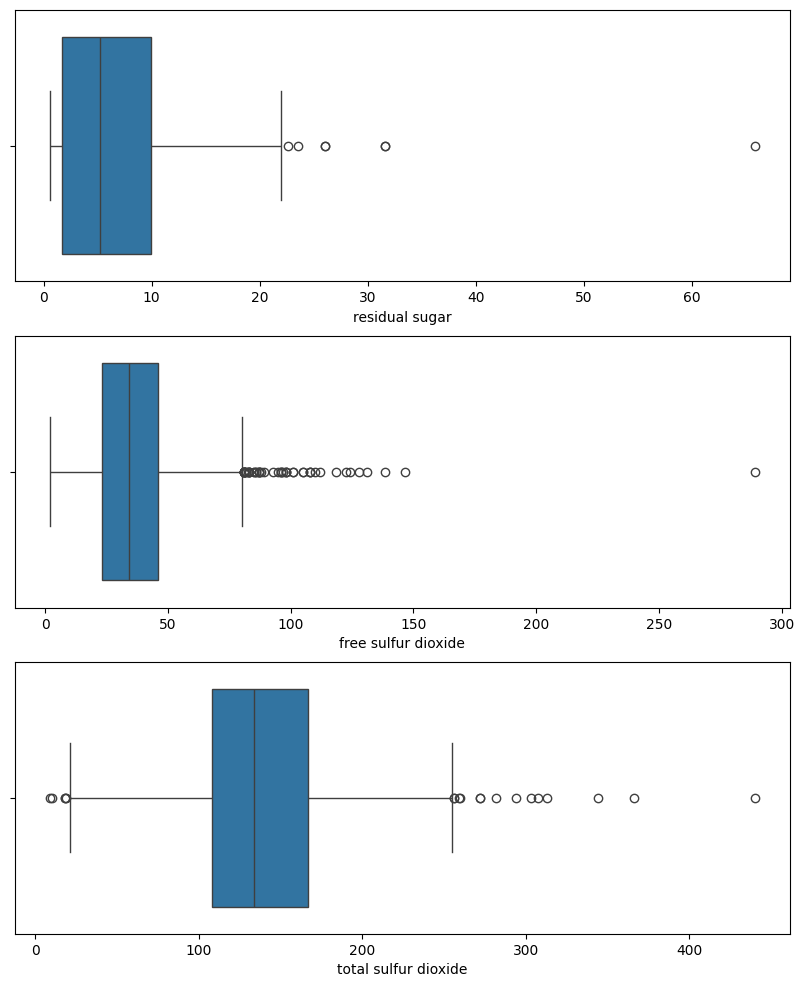

In [24]:
fig, axes = plt.subplots(3, 1, figsize=(10, 12))
sns.boxplot(data, x = "residual sugar", ax=axes[0])
sns.boxplot(data, x = "free sulfur dioxide", ax=axes[1])
sns.boxplot(data, x= "total sulfur dioxide", ax=axes[2])
plt.show()

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [6]:
data.isna().sum()

,0
fixed acidity,0
volatile acidity,0
citric acid,0
residual sugar,0
chlorides,0
free sulfur dioxide,0
total sulfur dioxide,0
density,0
pH,0
sulphates,0


In [7]:
data.shape

(4898, 12)

In [14]:
print(f"Il y a {data.duplicated().sum()} lignes dupliquées")

Il y a 937 lignes dupliquées


In [25]:
# Etape 2 : Nettoyage

#Il n'a pas de valeurs nulles, il y a quelques outliers et des doublons

data_clean = data.copy()
data_clean = data[(data['residual sugar']<= 30) & (data['free sulfur dioxide'] <= 150) &
    (data['total sulfur dioxide'] <= 280)]

data_clean  = data_clean.drop_duplicates().reset_index(drop = True)
data_clean.shape


(3951, 12)

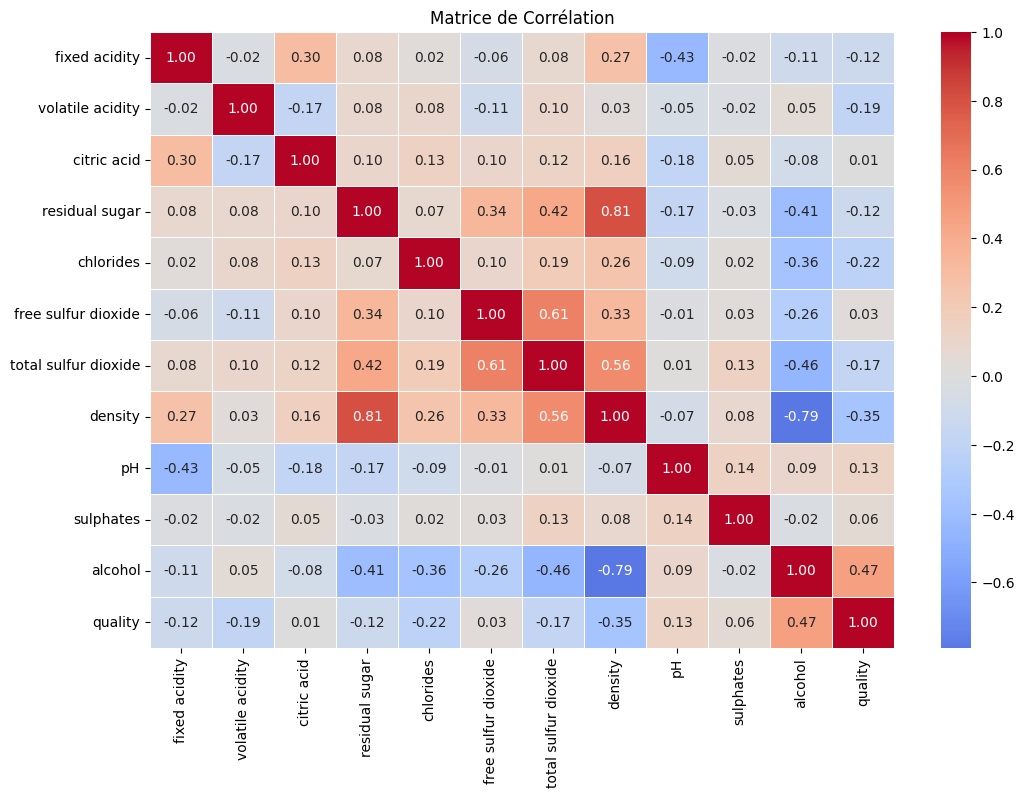

In [31]:
# Etape 3 : Etudes des corrélations

corr = data_clean.corr()

plt.figure(figsize=(12, 8))

# 3. Création de la heatmap
sns.heatmap(corr,
            fmt=".2f",
            annot = True,
            cmap='coolwarm',
            linewidths=0.5,
            center=0)

plt.title("Matrice de Corrélation")
plt.show()

In [50]:
# Etape 4 : Machine Learning
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Définir les X et les y
# X : 'density','residual sugar', 'total sulfur dioxide', 'quality', 'chlorides'
# y : 'alcohol'

features = ['density','residual sugar', 'total sulfur dioxide', 'quality', 'chlorides']

X = data_clean[features]
y = data_clean['alcohol']

# Train Test Split, train - test 80% / 20% - random_state : 42

X_train, X_test, y_train , y_test = train_test_split(X, y , random_state = 42, test_size = 0.2)

# Créer le modèle de regression linéaire



model_linear =  LinearRegression()

# Entrainer le modèle

model_linear.fit(X_train, y_train)

LinearRegression()

In [51]:
## Prédire sur les valeurs des données de test

y_pred_test = model_linear.predict(X_test)
y_pred_train = model_linear.predict(X_train)

In [52]:
## Calcul des scores pour les données Test et Train (coefficient de détermination)
r2_test = r2_score(y_test, y_pred_test)
r2_train = r2_score(y_train, y_pred_train)

print(f"R² test : {r2_test:.2f}")
print(f"R² train : {r2_train:.2f}")

R² test : 0.79
R² train : 0.79


In [57]:
## Afficher le coefficient (a) & Afficher l'intercept (b)
"""
ax + b
"""
a = model_linear.coef_
b = model_linear.intercept_

print(f"coefficient (a) : {a}")
print(f"intercept (b) : {b}")

print(f"formule regression : {a[0]} * 'density' + {a[1]} * 'residual sugar' + {a[2]} * 'total sulfur dioxide'+ {a[3]} * 'quality' + {a[4]} * 'chlorides' + {b}")

# Afficher les résultats
print("Régression linéaire - Prédiction de l'alcool en fonction de la densité, du sucre résiduel et dioxyde de souffre :")


coefficient (a) : [-5.40820720e+02  1.57946691e-01  1.74800881e-04  1.26086709e-01
 -4.06269545e+00]
intercept (b) : 546.5336261695815
formule regression : -540.8207198528938 * 'density' + 0.15794669096608605 * 'residual sugar' + 0.00017480088078300482 * 'total sulfur dioxide'+ 0.1260867093612956 * 'quality' + -4.062695447980834 * 'chlorides' + 546.5336261695815
Régression linéaire - Prédiction de l'alcool en fonction de la densité, du sucre résiduel et dioxyde de souffre :


In [62]:
# prediction sur des Nouvelles données
new_data = [0.99, 2.5, 30, 5.8, 0.045]

prediction = a[0] * new_data[0] +a[1] * new_data[1] + a[2] * new_data[2] + a[3] * new_data[3] + a[4] * new_data[4] + b

print(prediction)

12.06970588819172


In [65]:
new_data = [[0.99, 2.5, 30, 5.8, 0.045]]

prediction_2 = model_linear.predict(new_data)
print(prediction_2)

[12.06970589]


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


### 1.1.2 Decision tree Regressor
[Documentation officielle Scikit learn](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html)

 Les arbres de décision sont des algorithmes d'apprentissage automatique supervisé utilisés pour résoudre des problèmes de classification et de régression. Ils sont basés sur une structure d'arbre où chaque nœud représente une caractéristique (ou une variable) et chaque branche représente une décision basée sur cette caractéristique.

*Quelques infos supplémentaires:*
* [Machine Learning Basics: Decision Tree Regression](https://towardsdatascience.com/machine-learning-basics-decision-tree-regression-1d73ea003fda)

*Notions avancées:*
* [Random forest](https://en.wikipedia.org/wiki/Random_forest)
* [Random Forest Regression in Python](https://www.geeksforgeeks.org/random-forest-regression-in-python/)


In [66]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import root_mean_squared_error

In [67]:
import pandas as pd
from sklearn.datasets import fetch_california_housing # "https://inria.github.io/scikit-learn-mooc/python_scripts/datasets_california_housing.html"

# Charger l'ensemble de données California Housing
data = fetch_california_housing()
df = pd.DataFrame(data.data, columns=data.feature_names)
df.head(3)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24


In [68]:
df.shape

(20640, 8)

In [72]:
X = data.data
y = data.target # Median house value for California districts, expressed in hundreds of thousands of dollars ($100,000).

# Diviser les données en ensembles d'entraînement et de test, train - test 80% / 20% - random_state : 42

X_train, X_test, y_train, y_test = train_test_split(X, y , test_size = 0.2, random_state = 42)


# Créer un objet arbre de décision pour la régression

model_tree = DecisionTreeRegressor(max_depth=10)

# Entraîner l'arbre de décision

model_tree.fit(X_train, y_train)

# Prédire les valeurs pour les données de test

y_pred_test_tree = model_tree.predict(X_test)
y_pred_train_tree = model_tree.predict(X_train)

# Calculer l'erreur quadratique moyenne (RMSE) pour le Train et le Test

rmse_test = root_mean_squared_error(y_test, y_pred_test_tree)
rmse_train = root_mean_squared_error(y_train, y_pred_train_tree)

print(f"rmse test: {rmse_test}")
print(f" rmse train : {rmse_train}")


rmse test: 0.6469454127616747
 rmse train : 0.46996360625539524


In [73]:
# prediction sur des Nouvelles données
new_data = [[3.2, 36.0, 6.984127, 1.022, 250.0, 2.8, 37.88, -121.23]]

prediction_tree = model_tree.predict(new_data)

print(prediction_tree)

[1.38082318]


### 1.1.3 K-nearest neighbors regressor
[Documentation officielle Scikit learn](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html)

L'idée principale de cet algorithme est de prédire la valeur d'une variable cible en se basant sur les valeurs des k échantillons les plus proches dans l'espace des caractéristiques. Le KNN Regressor est relativement simple à comprendre et à mettre en œuvre. Cependant, il est important de noter qu'il peut être sensible à l'échelle des caractéristiques, donc il est souvent recommandé de normaliser les données avant d'appliquer l'algorithme.

N'oubliez pas que **le choix approprié de k peut avoir un impact significatif sur les performances de prédiction du modèle**. Une valeur trop petite de k peut rendre le modèle sensible au bruit, tandis qu'une valeur trop grande peut rendre le modèle trop généralisé.

*Quelques infos supplémentaires:*

* [KNN algorithm: Introduction to K-Nearest Neighbors Algorithm for Regression](https://www.analyticsvidhya.com/blog/2018/08/k-nearest-neighbor-introduction-regression-python/)
* [K Nearest Neighbors - Regression](https://www.saedsayad.com/k_nearest_neighbors_reg.htm)
* [KNN Regression Numerical Example](https://codinginfinite.com/knn-regression-numerical-example/)

In [170]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler

In [171]:
from sklearn.datasets import fetch_california_housing # "https://inria.github.io/scikit-learn-mooc/python_scripts/datasets_california_housing.html"

# Load the dataset
data = fetch_california_housing()
X = data.data
y = data.target  # median house value for California districts, expressed in hundreds of thousands of dollars ($100,000)


In [174]:
# # Diviser les données en ensembles d'entraînement et de test, test_size=0.2, random_state=42

X_train, X_test, y_train, y_test= train_test_split(X, y , test_size = 0.2 , random_state = 42)

# Créer un objet KNN regression
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model_knn = KNeighborsRegressor(n_neighbors = 5)

# Entrainer le modèle

model_knn.fit(X_train_scaled, y_train)

# Prédire les valeurs pour les données de test

y_pred_train_knn = model_knn.predict(X_train_scaled)
y_pred_test_knn = model_knn.predict(X_test_scaled)

# Evaluer le modèle (Train et Test)

rmse_test_knn = root_mean_squared_error(y_test, y_pred_test_knn)
rmse_train_knn = root_mean_squared_error(y_train, y_pred_train_knn)

print(f"rmse test: {rmse_test_knn}")
print(f" rmse train : {rmse_train_knn}")

rmse test: 0.6575877238850522
 rmse train : 0.5210586892553762


In [175]:
# prediction sur de nouvelles données
new_data = [[3.2, 36.0, 6.984127, 1.022, 250.0, 2.8, 37.88, -121.23]]
new_data_scaled = scaler.transform(new_data)

prediction_knn = model_knn.predict(new_data_scaled)

print(prediction_knn)

[1.635]


### 1.1.4 Principales métriques d'évaluation

Pour évaluer la performance d'un modèle de régression, plusieurs métriques peuvent être utilisées. Voici quelques-unes des métriques les plus pertinentes pour évaluer un modèle:

* **Erreur quadratique moyenne (RMSE)** : Le RMSE mesure la moyenne des erreurs au carré entre les valeurs prédites et les valeurs réelles. Il donne une indication de l'écart moyen entre les prédictions et les véritables valeurs de sortie. Une valeur de RMSE plus proche de zéro indique une meilleure performance du modèle.

* **Erreur absolue moyenne (MAE)** : Le MAE mesure la moyenne des erreurs absolues entre les valeurs prédites et les valeurs réelles. Il représente la magnitude moyenne des erreurs de prédiction, sans tenir compte de leur direction. Une valeur de MAE plus proche de zéro indique une meilleure performance du modèle.

* **Coefficient de détermination (R²)** : Le coefficient de détermination, également appelé R², mesure la proportion de la variance totale des valeurs de sortie qui est expliquée par le modèle. Il indique la capacité du modèle à ajuster les données. Il permet d'évaluer la qualité d'ajustement du modèle aux données observées. Il indique la proportion de la variance totale de la variable dépendante qui est expliquée par le modèle de régression.
Plus précisément, le R² mesure la proportion de la variation de la variable dépendante (y) qui peut être prédite à l'aide des variables indépendantes (x) incluses dans le modèle de régression. Il se situe entre 0 et 1, où 0 signifie que le modèle n'explique aucune variation et 1 signifie qu'il explique toute la variation de la variable dépendante.

* **Erreur relative moyenne (MRE)** : Le MRE est une mesure relative qui exprime l'erreur moyenne en pourcentage par rapport à la valeur réelle. Il fournit une indication de l'erreur moyenne relative du modèle. Une valeur de MRE plus proche de zéro indique une meilleure performance du modèle.

Il est important de noter que **les métriques pertinentes peuvent varier en fonction du contexte spécifique de votre problème et des objectifs que vous souhaitez atteindre**. Par exemple, si vous êtes particulièrement préoccupé par les grosses erreurs, le RMSE peut être une métrique plus pertinente. Si vous voulez avoir une idée de l'erreur moyenne en termes absolus, le MAE peut être plus approprié. Choisissez les métriques qui correspondent le mieux à votre objectif et à la nature spécifique de votre problème de régression.

[Regression Metrics for Machine Learning](https://machinelearningmastery.com/regression-metrics-for-machine-learning/)

In [176]:
from sklearn.metrics import mean_absolute_error, root_mean_squared_error, mean_absolute_percentage_error

# Comparer les scores de MAE, RMSE et MAPE des modèles tree_regressor et knn_regressor#
# MAPE est la MAE mais avec l'erreur moyenne exprimée en pourcentage (fonction mean_absolute_percentage_error)

# Quel modèle est le plus performant ?


rmse_test_knn = root_mean_squared_error(y_test, y_pred_test_knn)
rmse_test_tree = root_mean_squared_error(y_test, y_pred_test_tree)

mae_test_knn = mean_absolute_error(y_test, y_pred_test_knn)
mae_test_tree = mean_absolute_error(y_test, y_pred_test_tree)

mape_test_knn = mean_absolute_percentage_error(y_test, y_pred_test_knn)
mape_test_tree = mean_absolute_percentage_error(y_test, y_pred_test_tree)

print(f"RMSE KNN : {rmse_test_knn}")
print(f"RMSE Tree : {rmse_test_tree}")
print(f"MAE KNN : {mae_test_knn}")
print(f"MAE Tree : {mae_test_tree}")
print(f"MAPE KNN : {mape_test_knn}")
print(f"MAPE Tree : {mape_test_tree}")



RMSE KNN : 0.6575877238850522
RMSE Tree : 0.6469454127616747
MAE KNN : 0.4461535271317829
MAE Tree : 0.4334364722835839
MAPE KNN : 0.24668110427713882
MAPE Tree : 0.24931515524903328


In [ ]:
"""
le modele Tree est un peu meilleur
"""

## **1.2 classification**

 La classification supervisée utilise des données d'entraînement labellisées avec des catégories connues pour apprendre à prédire correctement la classe d'un nouvel échantillon. L'algorithme est entrainé pour faire correspondre les caractéristiques d'un échantillon à une classe prédéfinie.

* KNN
* regression logistique
* Decision tree

[Comparer rapidement des algorithmes de Machine Learning pour une régression / classification](https://penseeartificielle.fr/comparer-algorithme-machine-learning-regression-classification/)

[Comparing ML Models for Classification](https://www.kaggle.com/code/adoumtaiga/comparing-ml-models-for-classification)


### 1.2.1 K-Nearest Neighbors
K-NN peut être utilisé pour résoudre à la fois les problèmes de classification et de régression.
k fait référence au nombre de voisins les plus proches des données que nous essayons de classer.

In [177]:
import pandas as pd

df_pokemon = pd.read_csv('https://raw.githubusercontent.com/murpi/wilddata/master/pokemon.csv')
df_pokemon.head(3)

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False


In [178]:
df_pokemon['Legendary'].value_counts()

,count
Legendary,
False,735
True,65


In [179]:
X = df_pokemon.select_dtypes('number').drop(columns = ["#"]) # on ne selectionne que les features numériques, on supprime l'index qui n'apporte aucune information pertinente
y = df_pokemon['Legendary']     # on veut prédire si le pokemon est legendary

In [180]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
# Diviser les données en ensembles d'entraînement et de test

X_train, X_test, y_train, y_test = train_test_split(X, y , test_size = 0.2, random_state =42)

# on initialise le modèle
scaler = StandardScaler()
X_train_scaled_k = scaler.fit_transform(X_train)
X_test_scaled_k = scaler.transform(X_test)

model_knnc = KNeighborsClassifier(n_neighbors=5)

# on l'entraine
model_knnc.fit(X_train_scaled_k, y_train)
# on prédit

y_pred_test_knnc = model_knnc.predict(X_test_scaled_k)
y_pred_train_knnc = model_knnc.predict(X_train_scaled_k)

# on évalue sur Train et test
print("Classification test")
print(classification_report(y_test, y_pred_test_knnc))

print("Classification train")
print(classification_report(y_train, y_pred_train_knnc))


Classification test
              precision    recall  f1-score   support

       False       0.97      0.97      0.97       150
        True       0.56      0.50      0.53        10

    accuracy                           0.94       160
   macro avg       0.76      0.74      0.75       160
weighted avg       0.94      0.94      0.94       160

Classification train
              precision    recall  f1-score   support

       False       0.97      0.99      0.98       585
        True       0.88      0.67      0.76        55

    accuracy                           0.96       640
   macro avg       0.93      0.83      0.87       640
weighted avg       0.96      0.96      0.96       640



###Bonus

In [182]:
# on ajoute une colonne au df contenant les prédictions
X_scaled_total = scaler.transform(X)
df_pokemon['Prediction'] = model_knnc.predict(X_scaled_total)
df_pokemon.head(5)

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Prediction
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False,False
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False,False
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,1,False,False


In [183]:
# bonus ++ (on ne l'a jamais vu) : on ajoute une colonne contenant la probabilité que le pokemon soit legendary (indice : model.predict_proba())

df_pokemon['Probabilité'] = model_knnc.predict_proba(X_scaled_total)[:, 1]
df_pokemon[df_pokemon["Legendary"] == True ].head(5)

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Prediction,Probabilité
156,157,Articuno,Ice,Flying,90,85,100,95,125,85,1,True,False,0.4
157,158,Zapdos,Electric,Flying,90,90,85,125,90,100,1,True,True,0.6
158,159,Moltres,Fire,Flying,90,100,90,125,85,90,1,True,False,0.4
162,163,Mewtwo,Psychic,NaN,106,110,90,154,90,130,1,True,True,0.6
163,164,Mega Mewtwo X,Psychic,Fighting,106,190,100,154,100,130,1,True,True,0.8


### 1.2.2 Regression logistique
La régression logistique est une technique utilisée en apprentissage automatique pour résoudre des problèmes de classification binaire, c'est-à-dire lorsque nous voulons prédire une variable de sortie qui peut prendre seulement deux valeurs, par exemple "oui" ou "non", "vrai" ou "faux", "spam" ou "non-spam", etc.

In [109]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [110]:
import pandas as pd

link = "https://raw.githubusercontent.com/murpi/wilddata/master/quests/titanic.csv"
df_titanic = pd.read_csv(link)

df_titanic.sample(3)

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
106,1,3,Mr. Albert Johan Moss,male,29.00,0,0,7.7750
408,0,3,Mr. Todor Sdycoff,male,42.00,0,0,7.8958
641,1,3,Miss. Eugenie Baclini,female,0.75,2,1,19.2583


In [111]:
# quick preprocessing
df_titanic['Survived_label'] = df_titanic['Survived'].apply(lambda x: "Survived" if x == 1 else "Dead")
df_titanic['Sex_facto'] = df_titanic['Sex'].factorize()[0]

In [112]:
df_titanic.sample(3)

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare,Survived_label,Sex_facto
492,0,3,Mr. Gerious Yousseff,male,26.0,0,0,14.4583,Dead,0
309,1,1,Miss. Emily Borie Ryerson,female,18.0,2,2,262.3750,Survived,1
688,1,3,Miss. Manca Karun,female,4.0,0,1,13.4167,Survived,1


In [121]:
# train test split
from sklearn.model_selection import train_test_split

# garder toutes les colonnes numeriques excepté "survived" que l'on cherche à predire
X = df_titanic.drop(columns = ['Survived']).select_dtypes(include=['number'])
y = df_titanic["Survived"]
# Séparer les données entre train et test 70/30 et random state 36

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state= 36, test_size = 0.3)

In [122]:
# initialisation du model
from sklearn.linear_model import LogisticRegression
model_linear_regression = LogisticRegression()

# Entrainer le modèle

model_linear_regression.fit(X_train, y_train)

# Afficher les scores train et test

ypred_linear_test = model_linear_regression.predict(X_test)
ypred_linear_train = model_linear_regression.predict(X_train)


print("Classification test")
print(classification_report(y_test, ypred_linear_test))

print("Classification train")
print(classification_report(y_train, ypred_linear_train))

Classification test
              precision    recall  f1-score   support

           0       0.82      0.86      0.84       161
           1       0.77      0.72      0.74       106

    accuracy                           0.80       267
   macro avg       0.79      0.79      0.79       267
weighted avg       0.80      0.80      0.80       267

Classification train
              precision    recall  f1-score   support

           0       0.83      0.88      0.85       384
           1       0.78      0.70      0.74       236

    accuracy                           0.81       620
   macro avg       0.80      0.79      0.80       620
weighted avg       0.81      0.81      0.81       620



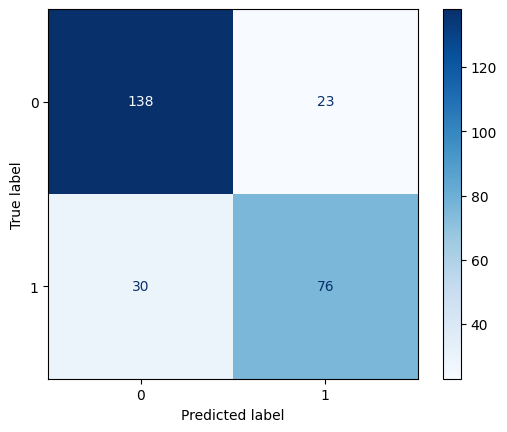

In [125]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
# Afficher la matrice de confusion du modèle

cm = confusion_matrix(y_test, ypred_linear_test)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model_linear_regression.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.show()

In [127]:
# prediction sur des Nouvelles données
new_data = pd.DataFrame([[3, 0, 43, 0, 0, 8.6542]], columns = X.columns)


prediction = model_linear_regression.predict(new_data)

print(prediction)

[1]


### 1.2.3 Decision tree Classifier
[Documentation officielle Scikit learn](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier)

 Les arbres de décision sont des algorithmes d'apprentissage automatique supervisé utilisés pour résoudre des problèmes de classification et de régression. Ils sont basés sur une structure d'arbre où chaque nœud représente une caractéristique (ou une variable) et chaque branche représente une décision basée sur cette caractéristique.

 *Quelques infos supplémentaires:*

 * [Decision Tree Classification in Python Tutorial](https://www.datacamp.com/tutorial/decision-tree-classification-python)

In [128]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [129]:
# The goal of this problem is to predict whether the balance scale will tilt to the left or right based on the weights on the two sides.
# B = balanced (équilibré)

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/balance-scale/balance-scale.data"
col = [ 'Class Name','Left weight','Left distance','Right weight','Right distance']

df = pd.read_csv(url, names=col, sep=',')

df.head(3)

,Class Name,Left weight,Left distance,Right weight,Right distance
0,B,1,1,1,1
1,R,1,1,1,2
2,R,1,1,1,3


In [130]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 625 entries, 0 to 624
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Class Name      625 non-null    object
 1   Left weight     625 non-null    int64 
 2   Left distance   625 non-null    int64 
 3   Right weight    625 non-null    int64 
 4   Right distance  625 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 24.5+ KB


<Axes: xlabel='Class Name', ylabel='count'>

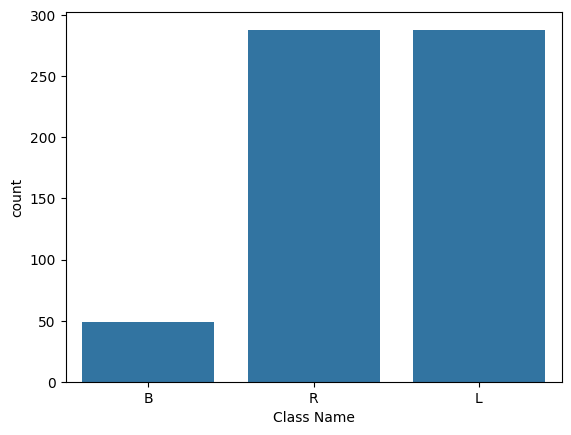

In [131]:
import seaborn as sns
sns.countplot(x=df['Class Name'])

We can see in the figure given below that most of the classes names fall under the labels R and L which means Right and Left respectively. Very few data fall under B, which stands for balanced.

<Axes: xlabel='Left weight', ylabel='count'>

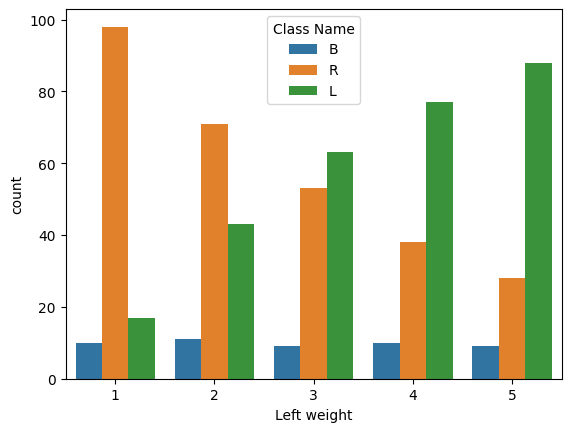

In [ ]:
sns.countplot(x=df['Left weight'],hue=df['Class Name'])

<Axes: xlabel='Right weight', ylabel='count'>

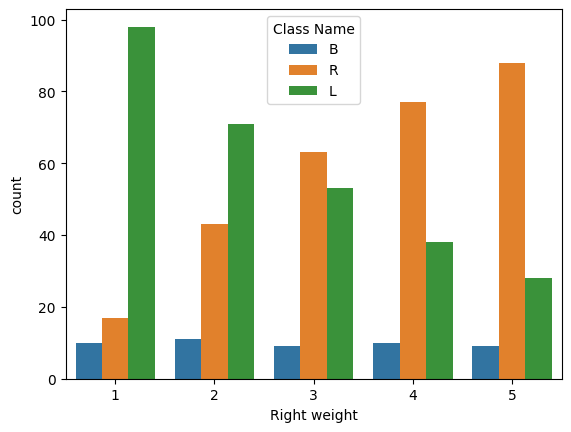

In [ ]:
sns.countplot(x=df['Right weight'],hue=df['Class Name'])

In [136]:
# Splitting the Dataset in Train-Test
from sklearn.model_selection import train_test_split

# Cible : 'Class Name'
X= df.drop(columns = "Class Name")
y = df['Class Name']

X_train, X_test, y_train, y_test = train_test_split(X, y , random_state = 42, stratify = y , test_size = 0.2)

In [137]:
# Training the Decision Tree Classifier : use class_weight to help the model with class B
from sklearn.tree import DecisionTreeClassifier

# Entrainer le modèle avec les paramètres suivants : random_state=42, max_depth=3, min_samples_leaf=5, class_weight='balanced'

model_tree_classifier = DecisionTreeClassifier(random_state=42, max_depth=3, min_samples_leaf=5, class_weight='balanced')

model_tree_classifier.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=3, min_samples_leaf=5,
                       random_state=42)

In [140]:
# Test Accuracy et Matrice de confusion
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix, ConfusionMatrixDisplay

# Afficher le score Accuracy du modèle puis la matrice de confusion

y_test_pred_treec = model_tree_classifier.predict(X_test)
y_train_pred_treec = model_tree_classifier.predict(X_train)


accuracy_test = accuracy_score(y_test, y_test_pred_treec)
accuracy_train = accuracy_score(y_train, y_train_pred_treec)

print(f"Accuracy test : {accuracy_test}")
print(f"Accuracy train : {accuracy_train}")

print(classification_report(y_test, y_test_pred_treec))

Accuracy test : 0.368
Accuracy train : 0.528
              precision    recall  f1-score   support

           B       0.08      0.60      0.14        10
           L       0.71      0.47      0.56        58
           R       1.00      0.23      0.37        57

    accuracy                           0.37       125
   macro avg       0.60      0.43      0.36       125
weighted avg       0.79      0.37      0.44       125



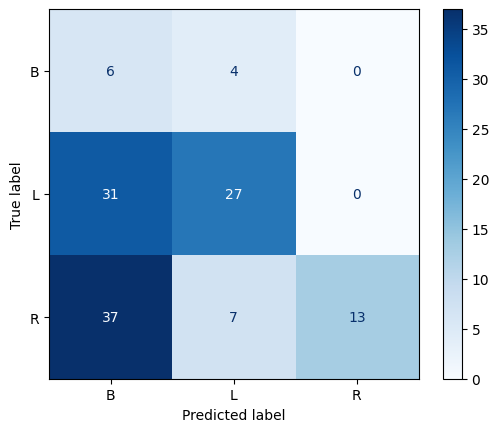

In [142]:
cm = confusion_matrix(y_test, y_test_pred_treec)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model_tree_classifier.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.show()

In [143]:
# prediction sur des Nouvelles données
new_data = pd.DataFrame([[1, 2, 5, 4]], columns = X.columns)

prediction5 = model_tree_classifier.predict(new_data)
print(prediction5)

['R']


[source de l'example](https://machinelearningknowledge.ai/decision-tree-classifier-in-python-sklearn-with-example/?utm_content=cmp-true)

### 1.2.4 Principales métriques d'évaluation

* **Matrice de confusion:**

la matrice de confusion permet d'évaluer les performances d'un modèle de classification en comparant les prédictions du modèle avec les valeurs réelles. Elle fournit des informations sur les vrais positifs, les vrais négatifs, les faux positifs et les faux négatifs, qui peuvent être utilisées pour calculer des métriques d'évaluation telles que la précision, le rappel et le F1-score.

**Voici quelques-unes des principales métriques utilisées :**

* **Précision (Precision)**: La précision mesure la proportion d'observations positives prédites correctement parmi toutes les observations positives prédites par le modèle. En d'autres termes, c'est le nombre de vrais positifs divisé par la somme des vrais positifs et des faux positifs. Une précision plus élevée indique que le modèle fait moins d'erreurs en classant les observations comme positives.

* **Rappel (Recall)** : Le rappel, également appelé sensibilité ou taux de vrais positifs, mesure la proportion d'observations positives prédites correctement parmi toutes les observations réellement positives. C'est le nombre de vrais positifs divisé par la somme des vrais positifs et des faux négatifs. Un rappel plus élevé indique que le modèle est capable de détecter un plus grand nombre d'observations positives.

* **F1-score** : Le F1-score est une mesure combinée de la précision et du rappel. Il est calculé comme la moyenne pondérée harmonique de la précision et du rappel. Le F1-score est souvent utilisé lorsque vous voulez trouver un équilibre entre la précision et le rappel. Une valeur plus élevée du F1-score indique un meilleur équilibre entre la précision et le rappel.

* **Exactitude (Accuracy)** : La précision mesure la proportion d'observations correctement classées parmi toutes les observations. C'est le nombre total de prédictions correctes (vrais positifs et vrais négatifs) divisé par le nombre total d'observations. La précision est une mesure générale de la performance du modèle, mais elle peut être trompeuse si les classes sont déséquilibrées.

Il est important de noter que **le choix des métriques dépend du problème de classification spécifique et des objectifs de votre modèle**. Par exemple, si vous souhaitez minimiser les faux positifs, la précision peut être une métrique appropriée. Si vous souhaitez minimiser les faux négatifs, le rappel peut être plus important.

Il est souvent recommandé d'utiliser plusieurs métriques ensemble pour obtenir une vue complète des performances du modèle. Assurez-vous également de prendre en compte le contexte de votre problème et les conséquences associées aux erreurs de classification.

[Metrics to Evaluate your Classification Model to take the right decisions](https://www.analyticsvidhya.com/blog/2021/07/metrics-to-evaluate-your-classification-model-to-take-the-right-decisions/)

[Guide to accuracy, precision, and recall](https://www.mage.ai/blog/definitive-guide-to-accuracy-precision-recall-for-product-developers)

[Métriques pour la classification](https://complex-systems-ai.com/analyse-des-donnees/metriques-pour-la-classification/)

In [144]:
# Affichez le rapport de classification
from sklearn.metrics import classification_report
print(classification_report(y_test, y_test_pred_treec))

              precision    recall  f1-score   support

           B       0.08      0.60      0.14        10
           L       0.71      0.47      0.56        58
           R       1.00      0.23      0.37        57

    accuracy                           0.37       125
   macro avg       0.60      0.43      0.36       125
weighted avg       0.79      0.37      0.44       125



## **1.3 Natural language processing**

Le NLP est un domaine spécialisé qui se concentre sur le traitement et l'analyse automatiques du langage naturel humain. Il vise à permettre aux ordinateurs de comprendre, d'interpréter et de générer un langage naturel de manière efficace. Le NLP englobe des tâches telles que la classification de texte, la traduction automatique, l'analyse de sentiment, la génération de texte, etc.

Dans le NLP, on peut utiliser des techniques de classification pour classer des documents en catégories spécifiques. De même, dans la régression, on peut appliquer des modèles pour prédire des variables dépendantes basées sur des caractéristiques textuelles extraites du NLP.

* [Qu’est-ce que le natural language processing (NLP) ?](https://experiences.microsoft.fr/articles/intelligence-artificielle/natural-language-processing/) (Par Microsoft)
* [Qu'est-ce que le traitement du langage naturel (NLP) ?](https://aws.amazon.com/fr/what-is/nlp/) (Par Amazon)
* [Traitement automatique du langage naturel (natural language processing ou NLP)](https://www.cnil.fr/fr/definition/traitement-automatique-du-langage-naturel-natural-language-processing-ou-nlp) (Par le CNIL)








### 1.3.1 Nettoyage du texte

In [215]:
# Import des données
import pandas as pd
url='https://drive.google.com/uc?id=1RcW4mmUtdDiC8umRfKjolyslYRNq4cNH'
df = pd.read_csv(url)
df = df.rename({"Class Index" : "Category"}, axis = 1)
df = df.iloc[:10000,:]
df.head()

,Category,Title,Description
0,3,Wall St. Bears Claw Back Into the Black (Reuters),"Reuters - Short-sellers, Wall Street's dwindli..."
1,3,Carlyle Looks Toward Commercial Aerospace (Reu...,Reuters - Private investment firm Carlyle Grou...
2,3,Oil and Economy Cloud Stocks' Outlook (Reuters),Reuters - Soaring crude prices plus worries\ab...
3,3,Iraq Halts Oil Exports from Main Southern Pipe...,Reuters - Authorities have halted oil export\f...
4,3,"Oil prices soar to all-time record, posing new...","AFP - Tearaway world oil prices, toppling reco..."


In [216]:
df.shape

(10000, 3)

In [217]:
# Import des librairies NLP
import nltk
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from wordcloud import WordCloud
from nltk.stem import WordNetLemmatizer
import spacy
nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [218]:
stopwordsenglish = nltk.corpus.stopwords.words("english")

nlp = spacy.load("en_core_web_sm")


In [219]:
# Créer une fonction clean_text qui supprimer les stop words
# Créer une nouvelle colonne Clean qui contient le texte nettoyer
# Le nettoyage du Dataset prend environ 30 secondes (un peu plus si vous lemmatisez aussi)

def func_clean(text) :
  # Spacy découpe automatiquement en tokens avec cette syntaxe :
  sent_tokens = nlp(text)
  # Create list
  words_lemma = [
      token.lemma_.lower()
      for token in sent_tokens
      #Ponctuation
      if not token.is_punct
      #espace
      and not token.is_space
      # mots communs
      and token.lemma_.lower() not in stopwordsenglish
]

  return " ".join(words_lemma)

df["Clean"] = df['Description'].apply(func_clean)

In [159]:
df.head(5)

,Category,Title,Description,Clean
0,3,Wall St. Bears Claw Back Into the Black (Reuters),"Reuters - Short-sellers, Wall Street's dwindli...",reuters short seller wall street 's dwindling\...
1,3,Carlyle Looks Toward Commercial Aerospace (Reu...,Reuters - Private investment firm Carlyle Grou...,"reuters private investment firm carlyle group,..."
2,3,Oil and Economy Cloud Stocks' Outlook (Reuters),Reuters - Soaring crude prices plus worries\ab...,reuters soar crude price plus worries\about ec...
3,3,Iraq Halts Oil Exports from Main Southern Pipe...,Reuters - Authorities have halted oil export\f...,reuters authorities halt oil export\flows main...
4,3,"Oil prices soar to all-time record, posing new...","AFP - Tearaway world oil prices, toppling reco...",afp tearaway world oil price topple record str...


In [160]:
# Réunion des 4 catégories de textes
# 1 = politics
# 2 = sports
# 3 = economy
# 4 = technology

dico_cat = {1 : "politics",
            2 : "sports",
            3 : "economy",
            4 : "technology"}

df["Category"] = df["Category"].map(dico_cat)
df

,Category,Title,Description,Clean
0,economy,Wall St. Bears Claw Back Into the Black (Reuters),"Reuters - Short-sellers, Wall Street's dwindli...",reuters short seller wall street 's dwindling\...
1,economy,Carlyle Looks Toward Commercial Aerospace (Reu...,Reuters - Private investment firm Carlyle Grou...,"reuters private investment firm carlyle group,..."
2,economy,Oil and Economy Cloud Stocks' Outlook (Reuters),Reuters - Soaring crude prices plus worries\ab...,reuters soar crude price plus worries\about ec...
3,economy,Iraq Halts Oil Exports from Main Southern Pipe...,Reuters - Authorities have halted oil export\f...,reuters authorities halt oil export\flows main...
4,economy,"Oil prices soar to all-time record, posing new...","AFP - Tearaway world oil prices, toppling reco...",afp tearaway world oil price topple record str...
...,...,...,...,...
9995,technology,Winamp flaw: Digital attacks use skins for cam...,Users of the music player should watch out for...,user music player watch hack theme flaw allow ...
9996,technology,BMC adds PeopleSoft management,BMC Software has released a new version of Pat...,bmc software release new version patrol people...
9997,economy,CAO chief faces Singapore probe,The chief of Beijing-backed China Aviation Oil...,chief beijing back china aviation oil 39;s cao...
9998,economy,A Microsoft deal gets full EU inquiry,BRUSSELS The European Commission has opened an...,brussels european commission open depth invest...


### 1.3.2 Bonus : Création de Nuages de mots

In [163]:
# Réunir tous les textes de politique (de la colonne 'Clean') en un seul texte

df_politique = df[df['Category']== "politics"]

text_politique= " ".join(df_politique['Clean'])
text_politique

'reuters venezuelans turn early\\and large number sunday vote historic referendum\\that either remove left wing president hugo chavez from\\office give new mandate govern next two\\years reuters south korean police use water cannon in\\central seoul sunday disperse least 7,000 protesters\\urge government reverse controversial decision to\\send troop iraq reuters thousand palestinian\\prisoners israeli jail begin hunger strike better\\conditions sunday israel \'s security minister say he\\didn\'t care starve death afp sporadic gunfire shell take place overnight dispute georgian region south ossetia violation fragile ceasefire wound seven georgian servicemen ap dozens rwandan soldier fly sudan \'s troubled darfur region sunday first foreign armed force deploy area since arab militiaman begin rampage black african farmer kill thousand reuters rwandan troop airlift sunday\\to sudan \'s darfur first foreign force mandate to\\protect observer monitor cease fire sudanese\\government rebel tro

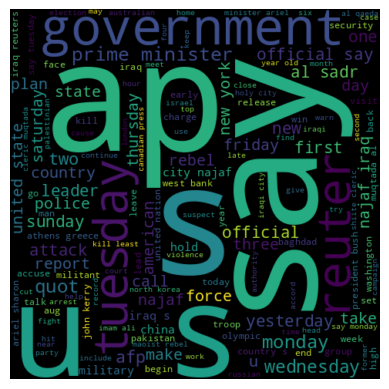

In [184]:
# Créer un wordcloud représentant la fréquences des mots des textes politiques
import matplotlib.pyplot as plt

wordcloud = WordCloud(width=480, height=480, max_font_size=200, min_font_size=10)
wordcloud.generate_from_text(text_politique)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

In [185]:
# Réunir tous les textes de technologie en un seul texte
df_techno = df[df['Category']== "technology"]

text_techno= " ".join(df_techno['Clean'])
text_techno

'reuters absenteeism little high\\on tuesday among guy office ea sports would like\\to think madden nfl 2005 come day,\\and fan football simulation rabid enough to\\take sick day play reuters group technology companies\\including texas instruments inc. txn.n stmicroelectronics\\(stm.pa broadcom corp. brcm.o thursday say they\\will propose new wireless network standard 10 times\\the speed current generation reuters america online thursday say it\\plans sell low price pc target low income minority\\households agree sign year dialup internet\\service reuters group consumer electronics\\makers say wednesday approve format new\\generation disc store five time datum dvds\\at cost enough put full season the\\sopranos one disc reuters mystery go wrong the\\software industry late june sale stall than\\20 brand name company even close solved\\although third quarter nearly halfway ap norwegian hacker fame develop dvd encryption crack software apparently strike 151 time break lock apple computer i

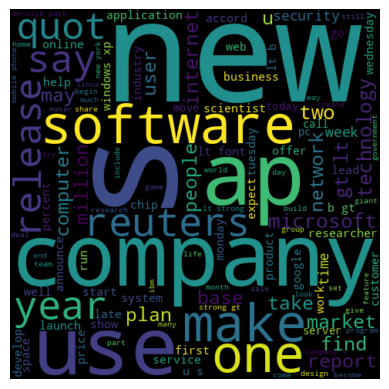

In [186]:
# Créer un wordcloud représentant la fréquences des mots des textes de technologie
wordcloud = WordCloud(width=480, height=480, max_font_size=200, min_font_size=10)
wordcloud.generate_from_text(text_techno)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

### 1.3.3 Classification de texte

In [187]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

# On réduit les textes aux catégories politique et technologie
data = df.query("Category == 'politics' or Category == 'technology'")

X = data["Clean"]
y = data["Category"]

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = .8, random_state=42)

In [188]:
# Numériser les données texte

vectorizer = TfidfVectorizer()
X_train_transformed = vectorizer.fit_transform(X_train)
X_test_transformed = vectorizer.transform(X_test)


In [189]:
# Entrainer un modèle de régression logistique
from sklearn.linear_model import LogisticRegression

model_lr = LogisticRegression()

model_lr.fit(X_train_transformed, y_train)

LogisticRegression()

In [191]:
# Afficher le rapport de classification
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

y_pred_test_lr = model_lr.predict(X_test_transformed)
y_pred_train_lr = model_lr.predict(X_train_transformed)

classification_test = classification_report(y_test, y_pred_test_lr)
classification_train = classification_report(y_train, y_pred_train_lr)

print("Classification test")
print(classification_test)

print("Classification train")
print(classification_train)

Classification test
              precision    recall  f1-score   support

    politics       0.94      0.93      0.93       520
  technology       0.93      0.94      0.93       517

    accuracy                           0.93      1037
   macro avg       0.93      0.93      0.93      1037
weighted avg       0.93      0.93      0.93      1037

Classification train
              precision    recall  f1-score   support

    politics       0.98      0.98      0.98      2003
  technology       0.98      0.98      0.98      2145

    accuracy                           0.98      4148
   macro avg       0.98      0.98      0.98      4148
weighted avg       0.98      0.98      0.98      4148



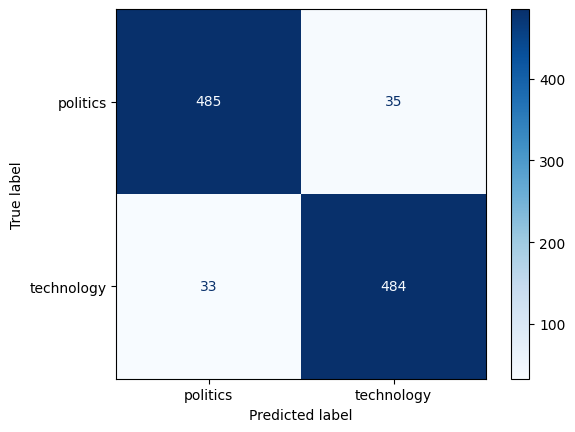

In [199]:
# Afficher la matrice de confusion

cm = confusion_matrix(y_test, y_pred_test_lr)



disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=model_lr.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.show()

# **2 - BONUS : Apprentissage non supervisé:**

L'apprentissage non supervisé est utilisé lorsque nous avons des données non étiquetées, c'est-à-dire des données sans informations sur les classes ou les étiquettes correspondantes. L'objectif principal de l'apprentissage non supervisé est de découvrir des modèles, des structures ou des regroupements intrinsèques dans les données.

[Qu’est-ce que l’apprentissage non supervisé ?](https://fr.linedata.com/quest-ce-que-lapprentissage-non-supervise#:~:text=L'apprentissage%20non%20supervis%C3%A9%20est,tr%C3%A8s%20peu%20d'intervention%20humaine.)

## **2.1 Clustering**
Le clustering est généralement considéré comme une technique de classification non supervisée. La classification non supervisée fait référence à des méthodes où les données ne sont pas étiquetées et où l'objectif est de regrouper les données similaires en fonction de leurs caractéristiques communes.

* Kmean

### 2.1.1 K-Means
L'utilité principale du K-means pour les data analysts est de fournir des informations sur la similarité entre les points de données. En regroupant les données en clusters, le K-means permet d'identifier des sous-groupes au sein de l'ensemble de données et de comprendre comment les points de données se regroupent en fonction de leurs caractéristiques.

Le K-means est souvent utilisé pour effectuer des analyses exploratoires de données, identifier des tendances ou des schémas cachés, segmenter les clients en groupes basés sur leur comportement d'achat, regrouper des documents similaires dans le traitement du langage naturel, ou encore prétraiter les données avant d'appliquer d'autres techniques d'apprentissage automatique.



In [200]:
from sklearn.cluster import KMeans

In [201]:
import pandas as pd
from sklearn.datasets import fetch_california_housing

df = pd.read_csv("https://raw.githubusercontent.com/mwaskom/seaborn-data/master/iris.csv")
df.head(3)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa


In [208]:
# Créer un modèle KMeans avec 3 clusters


X= df.drop(columns= ['species'])
modelKM = KMeans(n_clusters = 3)
modelKM.fit(X)

KMeans(n_clusters=3)

In [209]:
modelKM.labels_ # a chaque observation son cluster identifié, c'est avec cette information que vous créerez votre colonne de label

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int32)

In [210]:
modelKM.cluster_centers_  # l'ordre des colonnes est conservé

array([[5.88360656, 2.74098361, 4.38852459, 1.43442623],
       [5.006     , 3.428     , 1.462     , 0.246     ],
       [6.85384615, 3.07692308, 5.71538462, 2.05384615]])

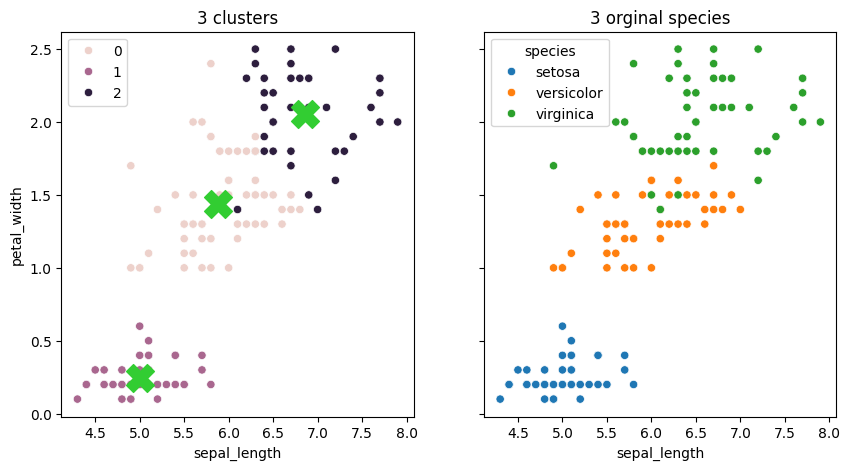

In [213]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize= (10,5), sharey = True)

# Left graph : clusters + cluster center in green
sns.scatterplot(ax = ax[0],
                x = df['sepal_length'],
                y = df['petal_width'],
                hue = modelKM.labels_)
ax[0].scatter(x = modelKM.cluster_centers_[:,0],
                y = modelKM.cluster_centers_[:,3], s =400, c = 'limegreen',
              marker = "X")

ax[0].set_title("3 clusters")

# Right graph : original species
sns.scatterplot(ax = ax[1],
                x = df['sepal_length'],
                y = df['petal_width'],
                hue = df['species'])

ax[1].set_title("3 orginal species")


plt.show()

### 2.1.2 Principales métriques d'évaluation



**Inertie intra-cluster : Elbow**
la cohésion des points à l'intérieur des clusters (/!\ outliers).

La méthode du coude évalue la variation de l'inertie intra-cluster en fonction du nombre de clusters.
L'inertie intra-cluster mesure la cohésion des points à l'intérieur de chaque cluster. Une valeur faible d'inertie indique que les points à l'intérieur d'un cluster sont similaires entre eux.
Dans la méthode du coude, on trace un graphique du nombre de clusters en fonction de l'inertie intra-cluster.
L'idée est de trouver le point du graphique où l'ajout d'un cluster supplémentaire n'apporte qu'une amélioration marginale de l'inertie intra-cluster.
Ce point est appelé "point du coude". Il est généralement considéré comme le nombre optimal de clusters.



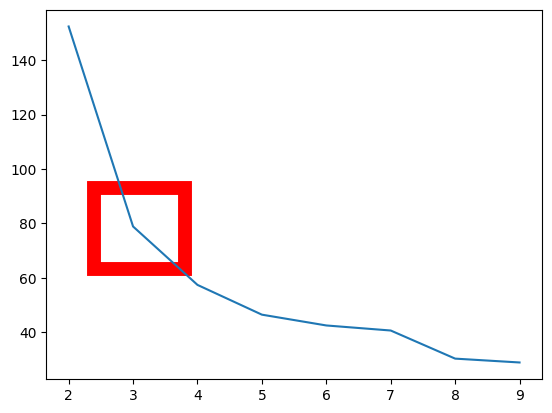

In [ ]:
# Elbow method
import matplotlib.patches as patches

dico = {}
for n_clusters in range(2,10):
  modelKM = KMeans(n_clusters = n_clusters, n_init = "auto")
  modelKM.fit(df.iloc[:,:-1])
  dico[n_clusters] = modelKM.inertia_

ax = sns.lineplot(x = dico.keys(),
             y = dico.values())
rect = patches.Rectangle((3*0.8, dico[3]*0.8),    # point de départ du rectangle (x,y)
                         1.4,30,                  # largeur et hauteur
                         linewidth=10,edgecolor='r',facecolor='none')

ax.add_patch(rect)
plt.show()

**Inertie inter-cluster : Silhouette**
la cohésion de séparation des clusters (le point est-il dans le bon cluster ?).

La méthode de la silhouette évalue à la fois la cohésion et la séparation des clusters.
Elle calcule la silhouette pour chaque point de données, qui mesure à quel point ce point est bien classé dans son propre cluster par rapport aux autres clusters.
La silhouette varie de -1 à 1, où une valeur proche de 1 indique que le point est bien classé, une valeur proche de 0 indique une incertitude, et une valeur proche de -1 indique que le point est mal classé.
Dans la méthode de la silhouette, on calcule la silhouette moyenne pour chaque nombre de clusters.
On recherche le nombre de clusters qui maximise la silhouette moyenne, ce qui indique une bonne séparation des clusters.

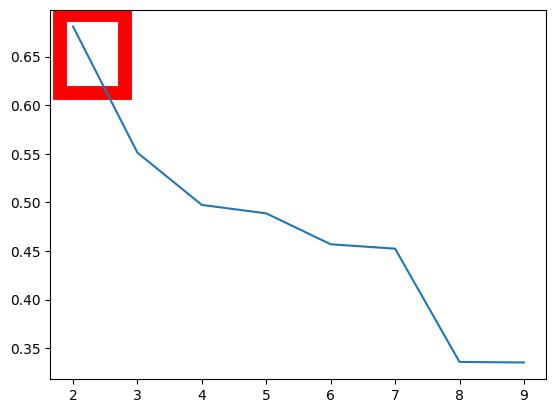

In [ ]:
# Silhouette
from sklearn.metrics  import silhouette_score

dico = {}
for n_clusters in range(2,10):
  modelKM = KMeans(n_clusters = n_clusters, n_init = "auto")
  modelKM.fit(df.iloc[:,:-1])
  dico[n_clusters] = silhouette_score(df.iloc[:,:-1], modelKM.labels_)

ax = sns.lineplot(x = dico.keys(),
                  y = dico.values())

rect = patches.Rectangle((2*0.9, dico[2]*0.9),1,0.08,linewidth=10,edgecolor='r',facecolor='none')


ax.add_patch(rect)
plt.show()


## 2.2 Bonus: Quelques cas pratique:

* [Electricity Price Prediction with Machine Learning](https://thecleverprogrammer.com/2021/11/15/electricity-price-prediction-with-machine-learning/) (RandomForestRegressor)
* [Ukraine Russia War Twitter Sentiment Analysis using Python](https://thecleverprogrammer.com/2022/03/15/ukraine-russia-war-twitter-sentiment-analysis-using-python/) (Nltk)
* [Stock Price Prediction using Machine Learning](https://thecleverprogrammer.com/2020/11/14/stock-price-prediction-using-machine-learning/) (LinearRegression)
* [Cryptocurrency Price Prediction Model](https://thecleverprogrammer.com/2021/12/27/cryptocurrency-price-prediction-with-machine-learning/)  (AutoTS library for time series analysis)
* [Extract Keywords using Python](https://thecleverprogrammer.com/2021/02/07/extract-keywords-using-python/) (Rake)

